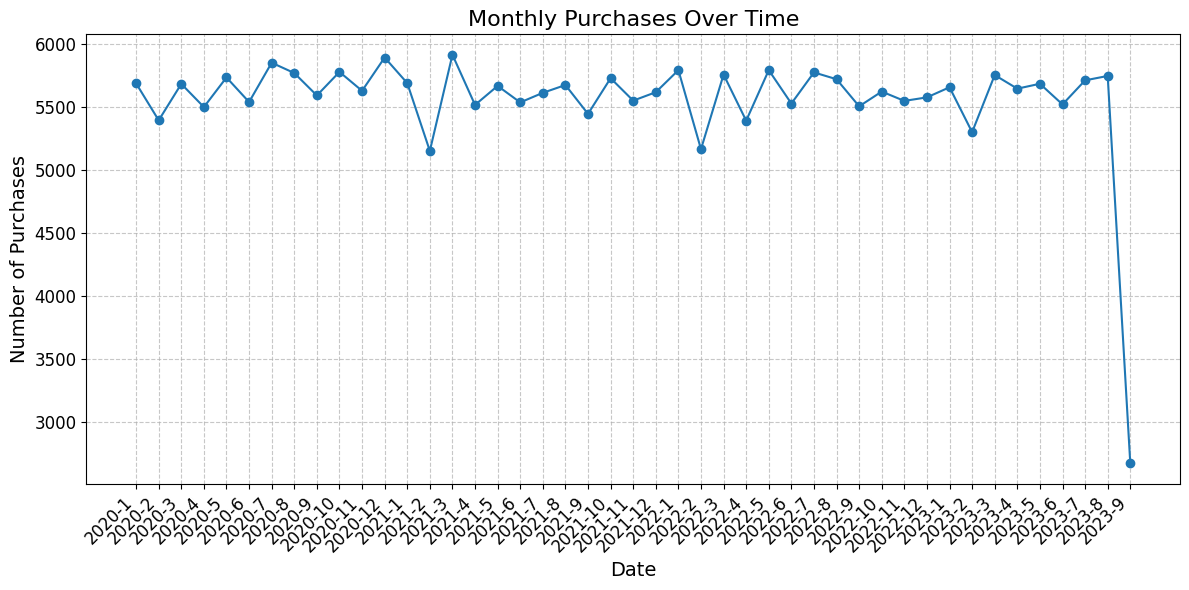

/tmp/ipython-input-6-1346927850.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')


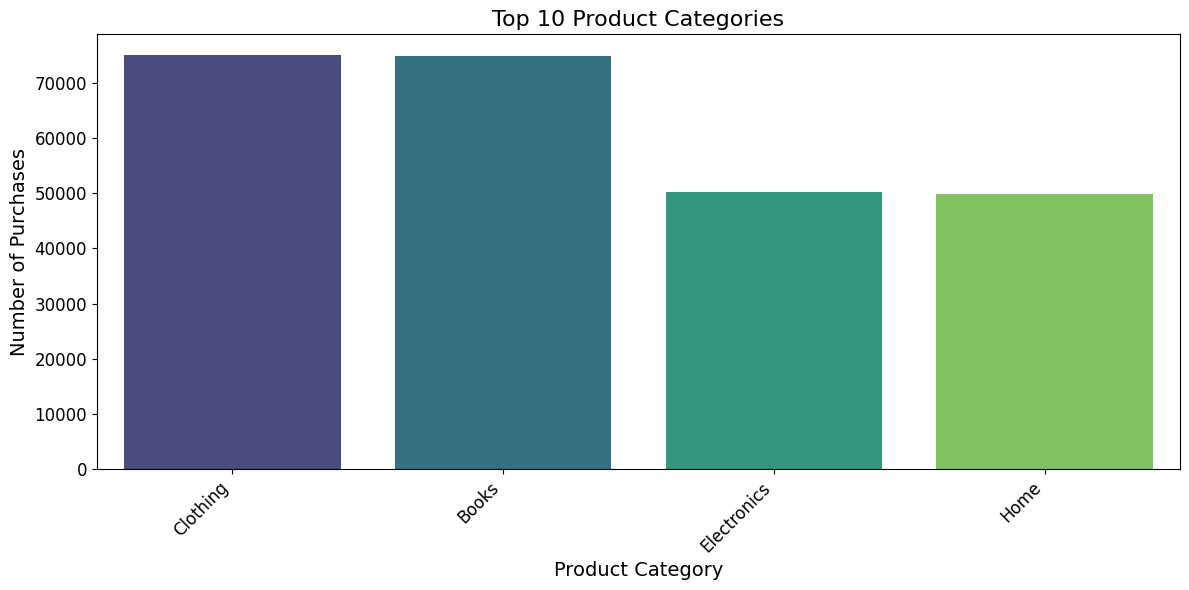

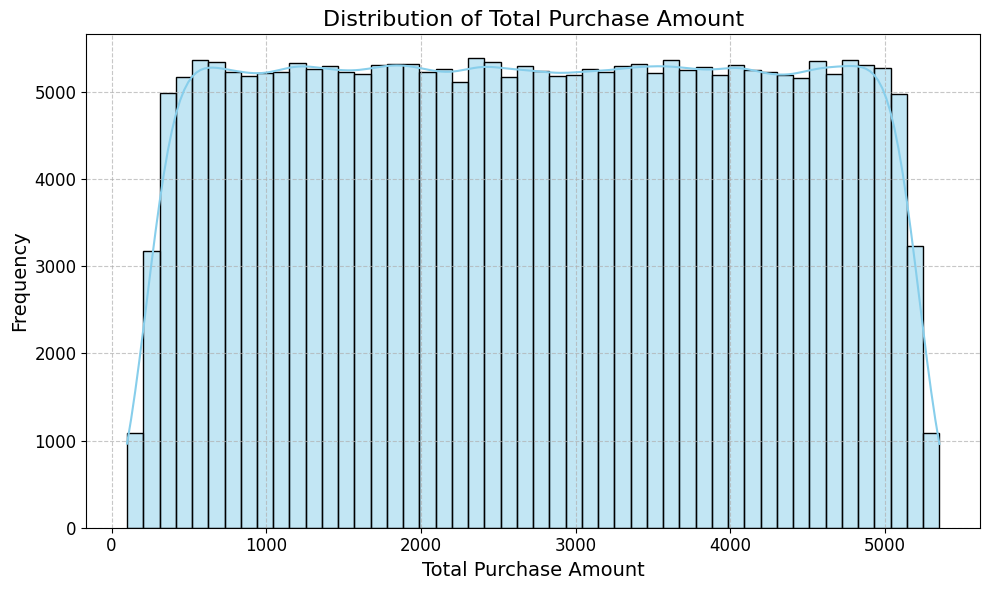

/tmp/ipython-input-6-1346927850.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_methods.index, y=payment_methods.values, palette='magma')


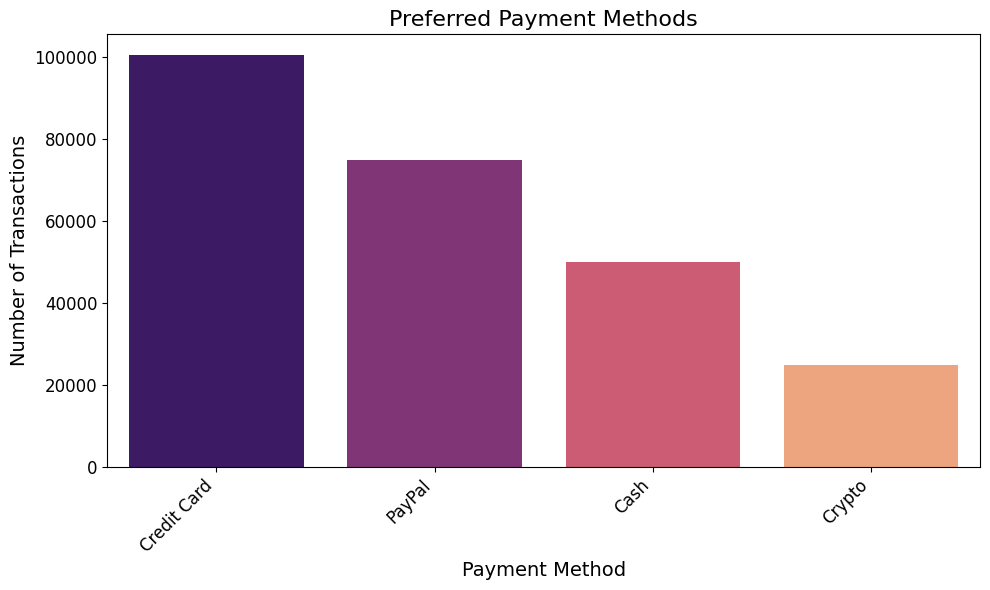

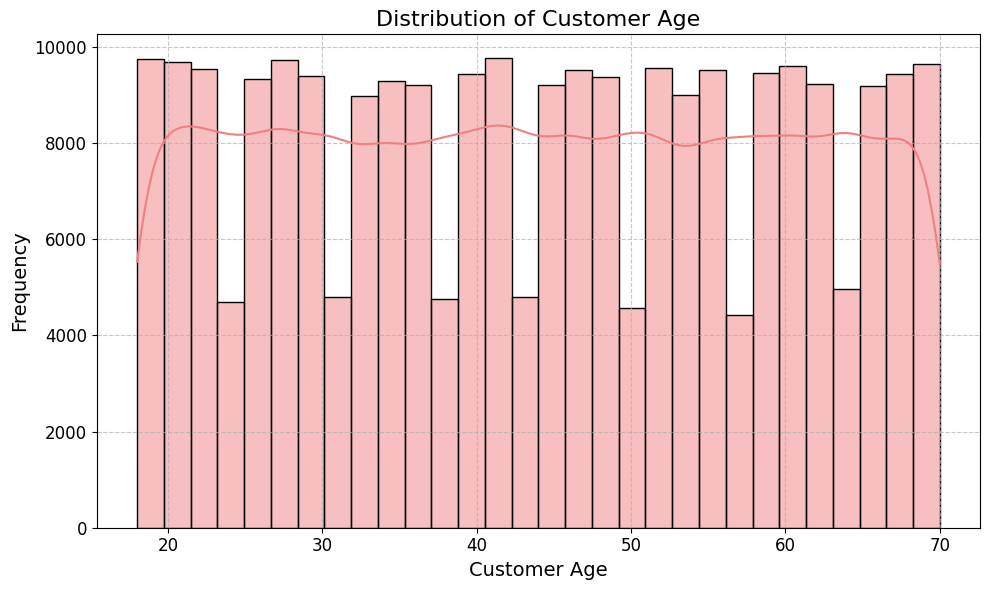

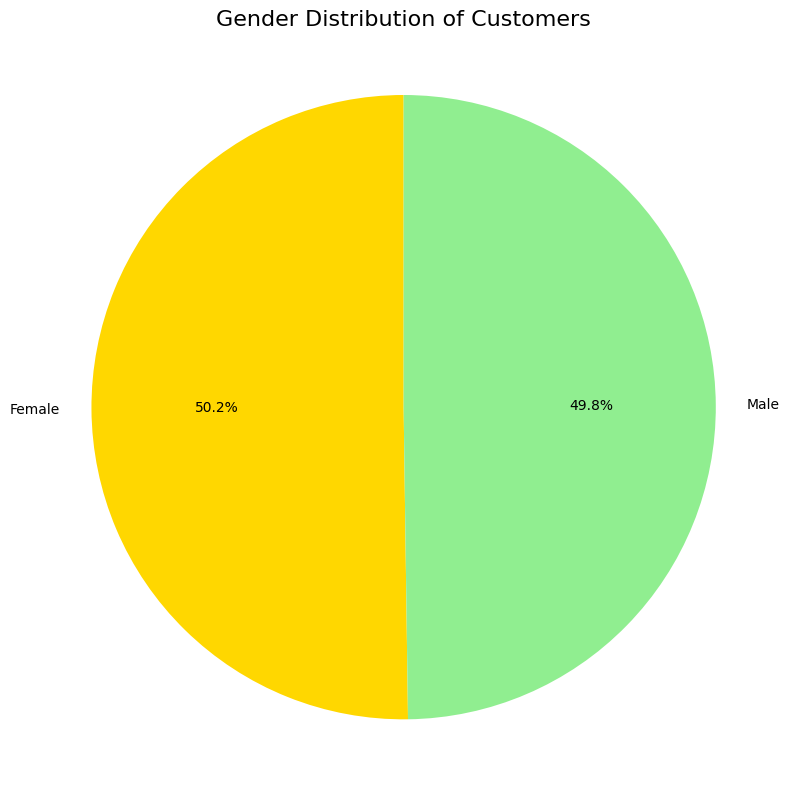

/tmp/ipython-input-6-1346927850.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Total Purchase Amount', data=avg_purchase_by_gender, palette='pastel')


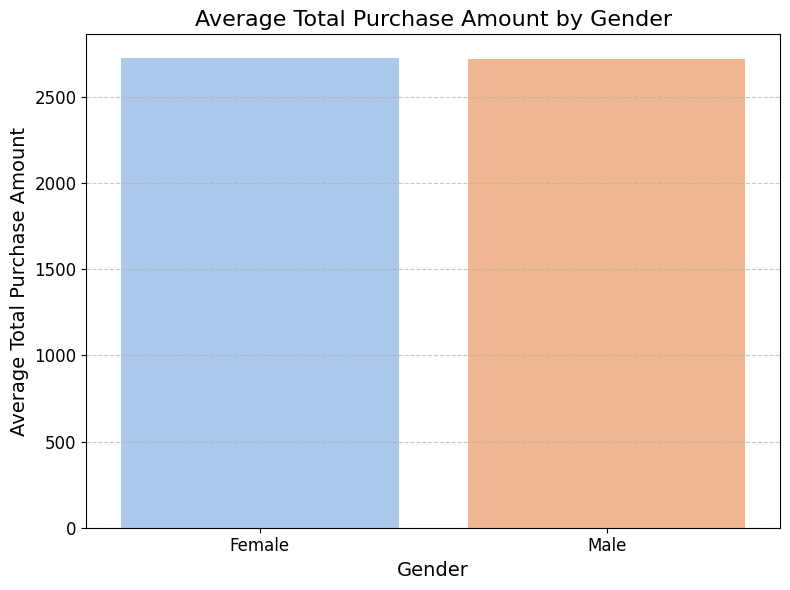

Percentage of returns: 40.31%

Percentage of churn: 19.95%


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('ecommerce_customer_data_custom_ratios.csv')

df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

df['Purchase Year'] = df['Purchase Date'].dt.year
df['Purchase Month'] = df['Purchase Date'].dt.month

monthly_purchases = df.groupby(['Purchase Year', 'Purchase Month']).size().reset_index(name='Number of Purchases')

plt.figure(figsize=(12, 6))
plt.plot(monthly_purchases['Purchase Year'].astype(str) + '-' + monthly_purchases['Purchase Month'].astype(str), monthly_purchases['Number of Purchases'], marker='o')
plt.title('Monthly Purchases Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Purchases', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('monthly_purchases_over_time.png')
plt.show()

top_categories = df['Product Category'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')
plt.title('Top 10 Product Categories', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Number of Purchases', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('top_product_categories.png')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Total Purchase Amount'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Total Purchase Amount', fontsize=16)
plt.xlabel('Total Purchase Amount', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('purchase_amount_distribution.png')
plt.show()

payment_methods = df['Payment Method'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=payment_methods.index, y=payment_methods.values, palette='magma')
plt.title('Preferred Payment Methods', fontsize=16)
plt.xlabel('Payment Method', fontsize=14)
plt.ylabel('Number of Transactions', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('payment_method_preferences.png')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Customer Age'], bins=30, kde=True, color='lightcoral')
plt.title('Distribution of Customer Age', fontsize=16)
plt.xlabel('Customer Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('customer_age_distribution.png')
plt.show()

gender_distribution = df['Gender'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=90, colors=['gold', 'lightgreen'])
plt.title('Gender Distribution of Customers', fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.savefig('gender_distribution.png')
plt.show()

avg_purchase_by_gender = df.groupby('Gender')['Total Purchase Amount'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Total Purchase Amount', data=avg_purchase_by_gender, palette='pastel')
plt.title('Average Total Purchase Amount by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Average Total Purchase Amount', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('avg_purchase_by_gender.png')
plt.show()

returns_percentage = (df['Returns'].sum() / len(df)) * 100
print(f"Percentage of returns: {returns_percentage:.2f}%\n")

churn_percentage = (df['Churn'].sum() / len(df)) * 100
print(f"Percentage of churn: {churn_percentage:.2f}%")